## Figure 5. Parameter space partition with different dynamics for $\epsilon$ and $\lambda$
- (a) Phase space partition when $\epsilon <0$ and $\lambda >0$
- (b) Full phase space partition, where the red, green and blue line respectively represents $A=0$, $A^2 -B =0$ and $B=0$.
- parameters : $\alpha = 0.1, \beta = 0.01, \delta = 0.02$ and $\gamma = 0.1$       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from PIL import Image
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

In [2]:
plt.rcParams["figure.figsize"] = (6,4.5)

In [3]:
np.seterr(divide='ignore', invalid='ignore') # avoiding invalid value encountered in true_divide

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# parameters
alpha = 0.1; beta = 0.01; 
delta = 0.02; gam = 0.1;

In [5]:
e = np.linspace(-5, 5, 1000)
l = np.linspace(-5,5, 1000)

eps, lamda = np.meshgrid(e,l)

In [6]:
A = alpha*gam*(eps*delta - beta*lamda)
B = (alpha**2)*(gam**2)*(eps*delta - beta*lamda)**2 - 4*alpha*gam*beta*delta*(beta*delta - alpha*eps*gam*lamda)

In [7]:
A.shape

(1000, 1000)

In [8]:
(beta*delta)/(alpha*gam)

0.019999999999999997

In [9]:
curA = (delta/beta)*e
curB1 = -(delta/beta)*e + (2*delta/(np.sqrt(alpha*gam)))
curB2 = -(delta/beta)*e - (2*delta/(np.sqrt(alpha*gam)))

In [10]:
cur1 = (beta*delta)/(alpha*gam*e[:-1])

In [11]:
cmap_modified = cm.get_cmap('gray')

newcmp = ListedColormap(cmap_modified(np.linspace(1,0.8, 256)))

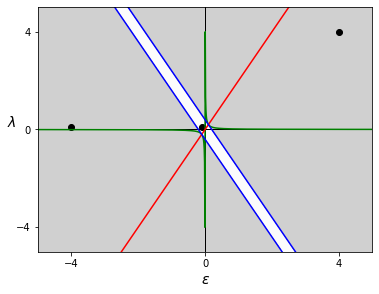

In [12]:
fig,axes=plt.subplots(1,1)

# plt.contour(eps, lamda, A, levels = 0, colors = 'red', linewidths=2.0)
# plt.contour(eps, lamda, B, levels = 0, colors = 'blue', linewidths=2.0)
# plt.contour(eps, lamda, A**2-B, levels = 0, colors = 'green', linewidths=2.0)


plt.contourf(eps, lamda, B>=0, cmap = newcmp)


plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

plt.plot([4],[4], 'ko')
plt.plot([-4],[0.1], 'ko')
plt.plot([-0.1],[0.1], 'ko')

plt.plot(e[:-1], cur1, color = 'green')
plt.plot(e, curA, color = 'red')
plt.plot(e, curB1, color = 'blue')
plt.plot(e, curB2, color = 'blue')

# plt.xlim([-5,0])  ## fig5 - (a)
# plt.ylim([0,5])
plt.xlim([-5,5])  ## fig5 - (b)
plt.ylim([-5,5])

# plt.text(-4, 2, r'$P_1$', fontsize = 14);
# plt.text(-1.4, 2.5, r'$P_2$', fontsize = 14);
# plt.text(-0.5, 3.8, r'$P_3$', fontsize = 14);

axes.xaxis.set_major_locator(MaxNLocator(3)) 
axes.yaxis.set_major_locator(MaxNLocator(3)) 

plt.xlabel(r'$\epsilon$', fontsize = 14)
plt.ylabel(r'$\lambda$',rotation=0, fontsize = 14)
# plt.savefig('re_image/fig5-1.eps', format='eps')
plt.show()

In [13]:
# sign test

t_eps = -0.4; t_lamda = 0.1;

t_A = alpha*gam*(t_eps*delta - beta*t_lamda)
t_B = (alpha**2)*(gam**2)*(t_eps*delta - beta*t_lamda)**2 - 4*alpha*gam*beta*delta*(beta*delta - alpha*t_eps*gam*t_lamda)

pm1 = t_A+np.sqrt(t_B)
pm2 = t_A-np.sqrt(t_B)
print(t_A, '\n', t_B)
print(pm1, '\n', pm2)

-9.000000000000003e-05 
 3.3000000000000023e-09
-3.2554373534619726e-05 
 -0.00014744562646538034
